In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

#Problem 1

##Dataset Creation

In [2]:
def Create_Dataset(Gamma,num_inputs=1000):
  each_set = int(num_inputs/2)
  X = np.random.normal(loc=0,scale=10,size=(10000,2))
  slope = np.tan(np.random.randint(20,75)*np.pi/180)
  D1 = np.zeros((each_set,2),dtype=float)
  D2 = np.zeros((each_set,2),dtype=float)
  d1,d2 = 0,0
  for i in range(X.shape[0]):
    if(X[i,1] > slope*X[i,0] + Gamma and d1<each_set):
      D1[d1,0],D1[d1,1] = X[i,0],X[i,1]
      d1+=1
    if(X[i,1] < slope*X[i,0] - Gamma and d2<each_set):
      D2[d2,0],D2[d2,1] = X[i,0],X[i,1]
      d2+=1
    if(d1>=500 and d2>=500):break
  return torch.tensor(D1), torch.tensor(D2)

In [3]:
# gamma = (0.1,0.5.1,2,4)
D1,D2 = Create_Dataset(0.1)
E1,E2 = Create_Dataset(0.5)
F1,F2 = Create_Dataset(1)
G1,G2 = Create_Dataset(2)
H1,H2 = Create_Dataset(4)

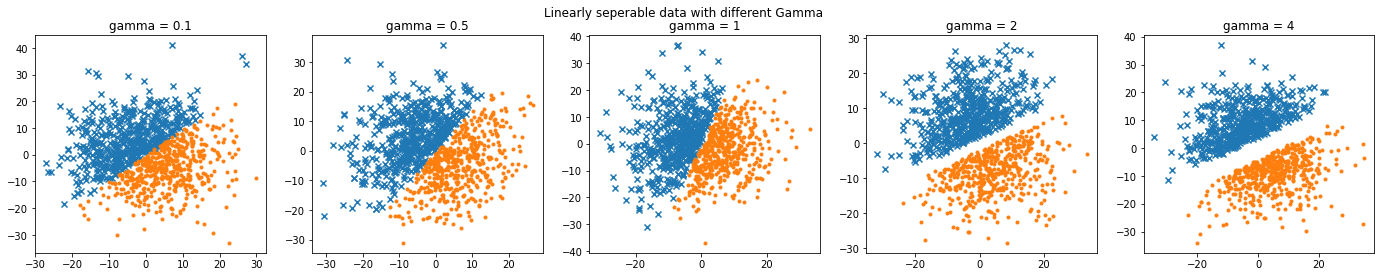

In [4]:
# plot the data
figure, axis = plt.subplots(1, 5,figsize=(24,4))
# Data_Created_Graph(D1,D2,0.5)
axis[0].scatter(D1[:,0], D1[:,1], marker = 'x')
axis[0].scatter(D2[:,0], D2[:,1], marker = '.')
axis[0].set_title("gamma = 0.1")

axis[1].scatter(E1[:,0], E1[:,1], marker = 'x')
axis[1].scatter(E2[:,0], E2[:,1], marker = '.')
axis[1].set_title("gamma = 0.5")

axis[2].scatter(F1[:,0], F1[:,1], marker = 'x')
axis[2].scatter(F2[:,0], F2[:,1], marker = '.')
axis[2].set_title("gamma = 1")

axis[3].scatter(G1[:,0], G1[:,1], marker = 'x')
axis[3].scatter(G2[:,0], G2[:,1], marker = '.')
axis[3].set_title("gamma = 2")

axis[4].scatter(H1[:,0], H1[:,1], marker = 'x')
axis[4].scatter(H2[:,0], H2[:,1], marker = '.')
axis[4].set_title("gamma = 4")

figure.suptitle('Linearly seperable data with different Gamma')
plt.show()

In [5]:
# Add the extra dimension (1) to data for bias : X = [xi yi 1] 
def Set_Train_Data(d1,d2):
  X=torch.empty(2*d1.shape[0],D1.size(1)+1).fill_(1) # 1000 x 3 matrix
  X[::2,:2] = d1
  X[1::2,:2] = d2
  # prepare the labels : Y = [+1 to 500 and -1 to next 500]
  Y=torch.empty(2*d1.shape[0],1)  # 1000 x 1 matrix
  Y[::2,:2] = 1.0
  Y[1::2,:2] = -1.0
  return X,Y

In [6]:
X1,Y1 = Set_Train_Data(D1,D2)
X2,Y2 = Set_Train_Data(E1,E2)
X3,Y3 = Set_Train_Data(F1,F2)
X4,Y4 = Set_Train_Data(G1,G2)
X5,Y5 = Set_Train_Data(H1,H2)

In [7]:
# Initialize W with all 0s # 1 x 3 matrix
# w.x = w1x1 + w2y2 + w3*1 (bias)
W1 = torch.zeros(3) 
W2 = torch.zeros(3)
W3 = torch.zeros(3)
W4 = torch.zeros(3)
W5 = torch.zeros(3)

In [8]:
# plot the data and W before training
def Create_Wgraph_bef(d1,d2):
  x = np.linspace(-20,20,500)
  y = np.zeros(500,) 
  plt.plot(x, y, '-r', label='W')
  plt.title('Graph of W before training')
  plt.xlabel('x', color='#1C2833')
  plt.ylabel('y', color='#1C2833')
  plt.legend(loc='upper left')
  plt.scatter(d1[:,0], d1[:,1],marker='x')
  plt.scatter(d2[:,0], d2[:,1],marker='.')
  plt.grid()
  plt.show()

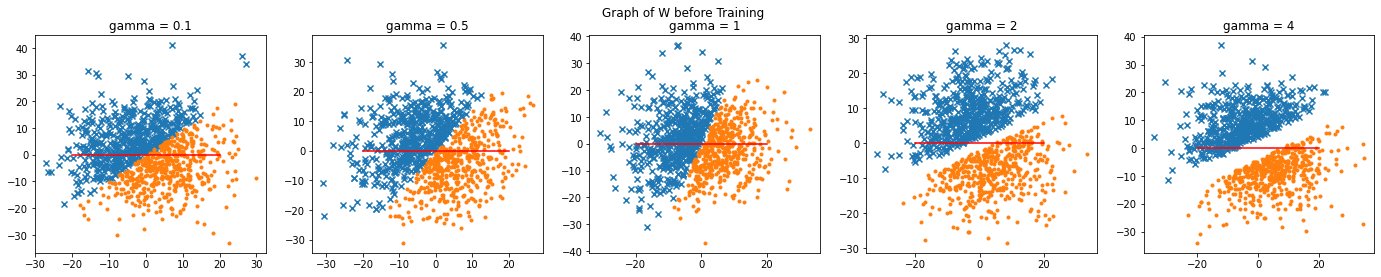

In [9]:
# plot the data
figure, axis = plt.subplots(1, 5,figsize=(24,4))
x = np.linspace(-20,20,500)
y = np.zeros(500,) 
# plt.plot(x, y, '-r', label='W')
axis[0].plot(x, y, '-r', label='W')
axis[0].scatter(D1[:,0], D1[:,1], marker = 'x')
axis[0].scatter(D2[:,0], D2[:,1], marker = '.')
axis[0].set_title("gamma = 0.1")

axis[1].plot(x, y, '-r', label='W')
axis[1].scatter(E1[:,0], E1[:,1], marker = 'x')
axis[1].scatter(E2[:,0], E2[:,1], marker = '.')
axis[1].set_title("gamma = 0.5")

axis[2].plot(x, y, '-r', label='W')
axis[2].scatter(F1[:,0], F1[:,1], marker = 'x')
axis[2].scatter(F2[:,0], F2[:,1], marker = '.')
axis[2].set_title("gamma = 1")

axis[3].plot(x, y, '-r', label='W')
axis[3].scatter(G1[:,0], G1[:,1], marker = 'x')
axis[3].scatter(G2[:,0], G2[:,1], marker = '.')
axis[3].set_title("gamma = 2")

axis[4].plot(x, y, '-r', label='W')
axis[4].scatter(H1[:,0], H1[:,1], marker = 'x')
axis[4].scatter(H2[:,0], H2[:,1], marker = '.')
axis[4].set_title("gamma = 4")

figure.suptitle('Graph of W before Training')
plt.show()

##Perceptron Learning Algorithm

In [10]:
#The perceptron training algorithm
def Train_Perceptron(x,y,w,no_epochs_max):
  ttl_no_of_changes = 0
  e = 0
  while True:
    no_changes = 0
    for i in range(x.size(0)):
      if x[i].dot(w) * y[i] <= 0:
        w += y[i] * x[i]
        no_changes+=1
        ttl_no_of_changes+=1
    if(no_changes == 0):
      print("Early stopping at epoch:",e)
      break
    e+=1
  print('Number of changes:',ttl_no_of_changes) 
  return w

In [11]:
# Call the traning algorithm
W1 = Train_Perceptron(X1,Y1, W1, 10)
print("Classifer:",W1,"\n")

W2 = Train_Perceptron(X2,Y2, W2, 10)
print("Classifer:",W2,"\n")

W3 = Train_Perceptron(X3,Y3, W3, 10)
print("Classifer:",W3,"\n")

W4 = Train_Perceptron(X4,Y4, W4, 10)
print("Classifer:",W4,"\n")

W5 = Train_Perceptron(X5,Y5, W5, 10)
print("Classifer:",W5,"\n")

Early stopping at epoch: 1
Number of changes: 23
Classifer: tensor([-28.2559,  29.2585,   1.0000]) 

Early stopping at epoch: 1
Number of changes: 10
Classifer: tensor([-33.0258,  22.2036,   0.0000]) 

Early stopping at epoch: 1
Number of changes: 8
Classifer: tensor([-23.3139,   9.1900,   0.0000]) 

Early stopping at epoch: 1
Number of changes: 8
Classifer: tensor([-16.0553,  34.5964,   0.0000]) 

Early stopping at epoch: 1
Number of changes: 2
Classifer: tensor([-6.9664, 12.8121,  0.0000]) 



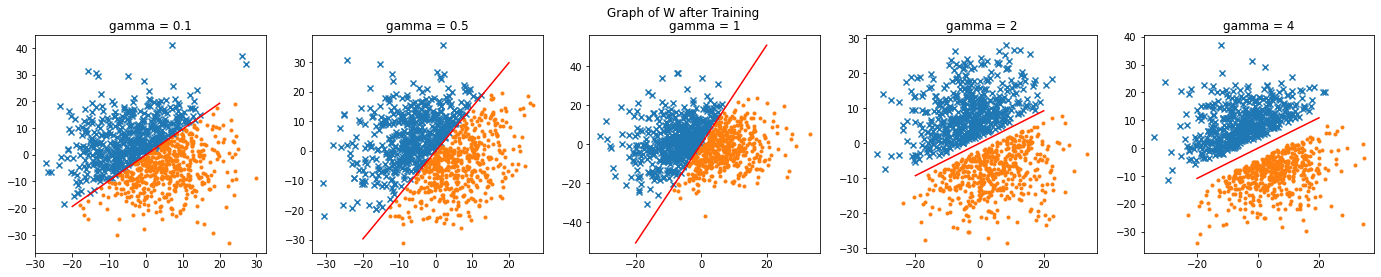

In [12]:
# plot classifer after training

figure, axis = plt.subplots(1, 5,figsize=(24,4))
x = np.linspace(-20,20,500)
y1 = -(W1[0].item()/W1[1].item())*x - (W1[2].item()/W1[1].item())
y2 = -(W2[0].item()/W2[1].item())*x - (W2[2].item()/W2[1].item())
y3 = -(W3[0].item()/W3[1].item())*x - (W3[2].item()/W3[1].item())
y4 = -(W4[0].item()/W4[1].item())*x - (W4[2].item()/W4[1].item())
y5 = -(W5[0].item()/W5[1].item())*x - (W5[2].item()/W5[1].item())

axis[0].plot(x, y1, '-r', label='W')
axis[0].scatter(D1[:,0], D1[:,1], marker = 'x')
axis[0].scatter(D2[:,0], D2[:,1], marker = '.')
axis[0].set_title("gamma = 0.1")

axis[1].plot(x, y2, '-r', label='W')
axis[1].scatter(E1[:,0], E1[:,1], marker = 'x')
axis[1].scatter(E2[:,0], E2[:,1], marker = '.')
axis[1].set_title("gamma = 0.5")

axis[2].plot(x, y3, '-r', label='W')
axis[2].scatter(F1[:,0], F1[:,1], marker = 'x')
axis[2].scatter(F2[:,0], F2[:,1], marker = '.')
axis[2].set_title("gamma = 1")

axis[3].plot(x, y4, '-r', label='W')
axis[3].scatter(G1[:,0], G1[:,1], marker = 'x')
axis[3].scatter(G2[:,0], G2[:,1], marker = '.')
axis[3].set_title("gamma = 2")

axis[4].plot(x, y5, '-r', label='W')
axis[4].scatter(H1[:,0], H1[:,1], marker = 'x')
axis[4].scatter(H2[:,0], H2[:,1], marker = '.')
axis[4].set_title("gamma = 4")

figure.suptitle('Graph of W after Training')
plt.show()

##Observations and Analysis

###Observation 1:
We can say that as the gamma (level of seperatablity) increases the number of changes required to get the final classifer W decreases, i.e we get our desired result with few runs of perceptron.

###Observation 2:
Since we are taking linearly seperable data by default we often get our result in few number of epochs. As each epoch corresponds 1000 points of test data after running perceptron on those points we often get the classifier near to the ideal one in less epochs.

###Observation 3:
As we reduce the variance of the Normal distribution it takes more number of changes for smaller gamma and less number of changes for higher gamma since as the variance decreases for lesser gamma it becomes hard to classify the data whereas for higher gamma it becomes easier.

#Problem 2

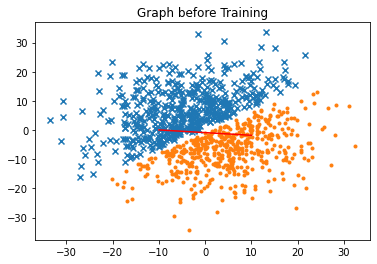

In [13]:
# Creation of required dataset
Ds1,Ds2 = Create_Dataset(1)
Xgd, Ygd = Set_Train_Data(Ds1,Ds2)
Wgd = torch.rand(3)

x = np.linspace(-10,10,500)
y = -(Wgd[0].item()/Wgd[1].item())*x - (Wgd[2].item()/Wgd[1].item())
plt.plot(x, y, '-r', label='W')
plt.scatter(Ds1[:,0], Ds1[:,1], marker = 'x')
plt.scatter(Ds2[:,0], Ds2[:,1], marker = '.')
plt.title("Graph before Training")
plt.show()

##Loss Formulation with its Gradient Computation

In [14]:
def Hinge_Loss(x,y,w):
  loss = 0
  num_data = x.shape[0]
  dw = torch.zeros(3)

  for i in range(num_data):
    z = y[i] * (x[i]@w)
    if(1-z > 0):
      loss += 1-z
      dw += -(y[i]*x[i])
  loss/=num_data
  dw/=num_data
  return loss,dw

##Updating W using Gradient Descent Equation

In [15]:
#The gradient descent algorithm
def Train_Gradient_Descent(x,y,w,learning_rate=0.001,no_epochs_max=1000):
  no_of_runs = 0
  Losses = np.zeros(no_epochs_max)
  for e in range(no_epochs_max):
    loss,dw = Hinge_Loss(x,y,w)
    Losses[e] = loss
    w -= learning_rate*dw #updating W
    no_of_runs+=1
  return w,Losses

In [16]:
Wgd,Loss_in_itr = Train_Gradient_Descent(Xgd,Ygd, Wgd)
print("Classifer:",Wgd,"\n")

Classifer: tensor([-0.4518,  0.6962,  0.6852]) 



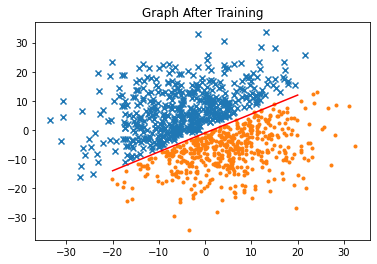

In [17]:
x = np.linspace(-20,20,500)
ygd = -(Wgd[0].item()/Wgd[1].item())*x - (Wgd[2].item()/Wgd[1].item())

plt.plot(x, ygd, '-r', label='W')
plt.scatter(Ds1[:,0], Ds1[:,1], marker = 'x')
plt.scatter(Ds2[:,0], Ds2[:,1], marker = '.')
plt.title("Graph After Training")
plt.show()

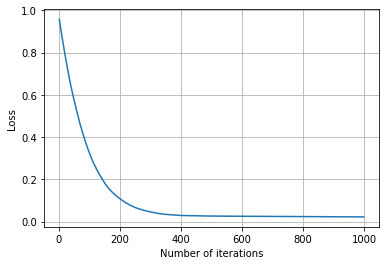

In [18]:
x = np.arange(1,1000)
y = Loss_in_itr[x-1]

plt.plot(x,y)
plt.ylabel("Loss")
plt.xlabel("Number of iterations")
plt.grid()
plt.show()

#Problem 3

##Creation of Non Linear Data Set

In [19]:
def Create_NL_Dataset(r1,r2,num_points):
  each_set = int(num_points/2)
  D1 = np.zeros((each_set,2),dtype=float)
  D2 = np.zeros((each_set,2),dtype=float)
  for i in range(each_set):
    theta = np.random.uniform(0*np.pi/180,360*np.pi/180)
    sine = np.sin(theta)
    cos = np.cos(theta)
    rad1 = np.random.uniform(r1-0.5,r1+0.5)
    # print(sine)
    D1[i,0],D1[i,1] = rad1*sine,rad1*cos

  for i in range(each_set):
    theta = np.random.uniform(0*np.pi/180,360*np.pi/180)
    sine = np.sin(theta)
    cos = np.cos(theta)
    rad2 = np.random.uniform(r2-0.5,r2+0.5)
    D2[i,0],D2[i,1] = rad2*sine,rad2*cos

  return torch.tensor(D1), torch.tensor(D2)

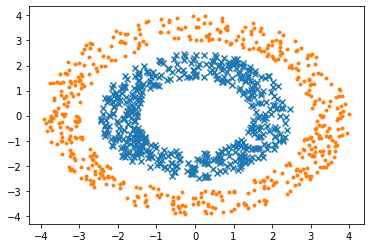

In [20]:
Dr1,Dr2 = Create_NL_Dataset(2,3.5,1000)
# print(Dr1)
plt.scatter(Dr1[:,0], Dr1[:,1], marker = 'x')
plt.scatter(Dr2[:,0], Dr2[:,1], marker = '.')
plt.show()

In [21]:
Xmlp , Ymlp = Set_Train_Data(Dr1,Dr2)
# Xmlp = np.array(Xmlp.t()[:2,::])
Xmlp = np.array(Xmlp.t()[:2,::])
Ymlp = np.array(Ymlp.t())
print(Xmlp.shape,Ymlp.shape)

(2, 1000) (1, 1000)


##Taking Hinge Loss and its Derivative

In [22]:
def Hinge_Loss_MLP(x):
  return np.maximum(0,1-x)

def Derv_Hinge_Loss(x):
  return np.where(x < 1,-1,0)

##Sigmoid Function for Activation

In [23]:
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

def dsigmoid(x):
  return x*(1.0-x)

##Backpropagation Algorithm implemented in MLP

###Multi Layered Perceptron:
A multilayer perceptron (MLP) is a feed forward artificial neural network that generates a set of outputs from a set of inputs. Input layer, Hidden layer and Output layer are components of MLP. Here we use backpropagation with hinge loss. 

In [24]:
def Train_MLP(X,Y,Hidden_layer=5,learning_rate=0.0002,no_of_epochs=1000):
  weg1 = np.random.uniform(-1, 1, (Hidden_layer,2))
  b1 = np.random.uniform(-1, 1, (Hidden_layer, 1))
  weg2 = np.random.uniform(-1, 1, (1,Hidden_layer))
  b2 = np.random.uniform(-1, 1, (1, 1))

  for i in range(no_of_epochs): 
    #forward pass
    lay0 = X #input layer
    lay1 = sigmoid(weg1@lay0 + b1) #hidden layer
    lay2 = weg2@lay1 + b2 #output layer

    #backpropagation algorithm
    dlay2 = Derv_Hinge_Loss(Y * lay2) * Y
    dw2 = dlay2@lay1.T
    db2 = np.sum(dlay2,axis=1,keepdims=True)
    dlay1 = (weg2.T@dlay2) * dsigmoid(lay1)
    dw1 = dlay1@lay0.T
    db1 = np.sum(dlay1,axis=1,keepdims=True)

    #Update weights
    weg1 -= learning_rate*dw1
    b1 -= learning_rate*db1
    weg2 -= learning_rate*dw2
    b2 -= learning_rate*db2

  return weg1,b1,weg2,b2

## Testing with Data to find Accuracy

In [25]:
def Test_MLP(X,Y,weg1,b1,weg2,b2):
  lay1 = sigmoid(weg1@X + b1)
  lay2 = weg2@lay1 + b2

  #loss
  loss = Hinge_Loss_MLP(Y*lay2)
  acc = np.sum(np.where(Y*lay2 > 0,1,0)) / X.shape[1]
  return loss,acc

In [26]:
Wt0,b0,Wt1,b1 = Train_MLP(Xmlp,Ymlp)
loss,acc = Test_MLP(Xmlp,Ymlp,Wt0,b0,Wt1,b1)
print("Mean Hinge Loss:",np.mean(loss))
print("Accuracy of MLP:",acc*100,"percent")

Mean Hinge Loss: 0.12323344963014314
Accuracy of MLP: 98.6 percent
